In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the main folder containing subfolders
main_folder = '/content/drive/MyDrive/Durian'
subfolders = ['AlgalLeafSpot', 'LeafBlight', 'Leaf-Spot', 'NoDisease']

In [ ]:
# Load images and labels
images = []
labels = []
label_map = {name: i for i, name in enumerate(subfolders)}

for subfolder in subfolders:
    path = os.path.join(main_folder, subfolder)
    for filename in os.listdir(path):
        if filename.endswith(('jpg', 'jpeg', 'png')):
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (128, 128))  # Resize to a fixed size
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label_map[subfolder])

In [ ]:
# Convert to numpy arrays
X = np.array(images, dtype=np.float32)
y = np.array(labels)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# **SVM Model**

In [ ]:
# Standardize the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

In [ ]:
# Train an SVM model
svm_model = svm.SVC(kernel='linear', C=2.0, random_state=10)
svm_model.fit(X_train_scaled.reshape(X_train_scaled.shape[0], -1), y_train)

SVC(C=2.0, kernel='linear', random_state=10)

In [ ]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test.reshape(X_test.shape[0], -1))
print(f"Shapes -> y_test: {y_test.shape}, y_pred_svm: {y_pred_svm.shape}")

Shapes -> y_test: (240,), y_pred_svm: (240,)


In [ ]:
# Calculate accuracy
if len(y_test) == len(y_pred_svm):
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    print(f'SVM Accuracy: {accuracy_svm:.2f}')
else:
    print("Error: Mismatch in the number of samples between y_test and y_pred_svm")

SVM Accuracy: 0.32


SVM Train Accuracy: 0.51
SVM Test Accuracy: 0.32


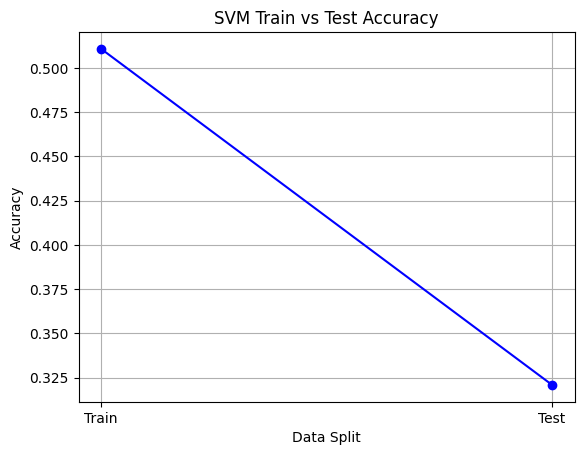

In [ ]:
# Plot SVM train and test accuracy
train_accuracy_svm = svm_model.score(X_train.reshape(X_train.shape[0], -1), y_train)
print(f'SVM Train Accuracy: {train_accuracy_svm:.2f}')
print(f'SVM Test Accuracy: {accuracy_svm:.2f}')
plt.figure()
plt.plot(['Train', 'Test'], [train_accuracy_svm, accuracy_svm], marker='o', linestyle='-', color='b')
plt.title('SVM Train vs Test Accuracy')
plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

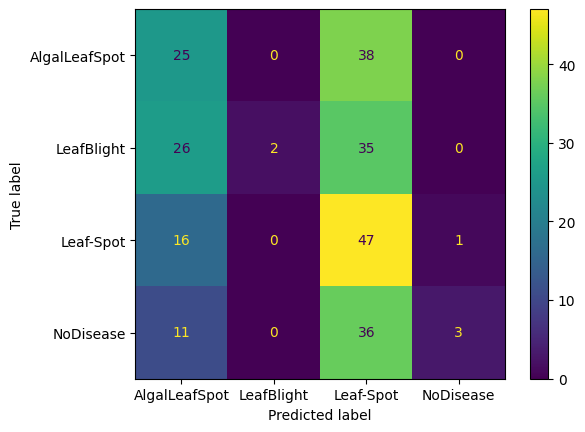

In [ ]:
# Display confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=subfolders)
disp_svm.plot(cmap='viridis')
plt.show()

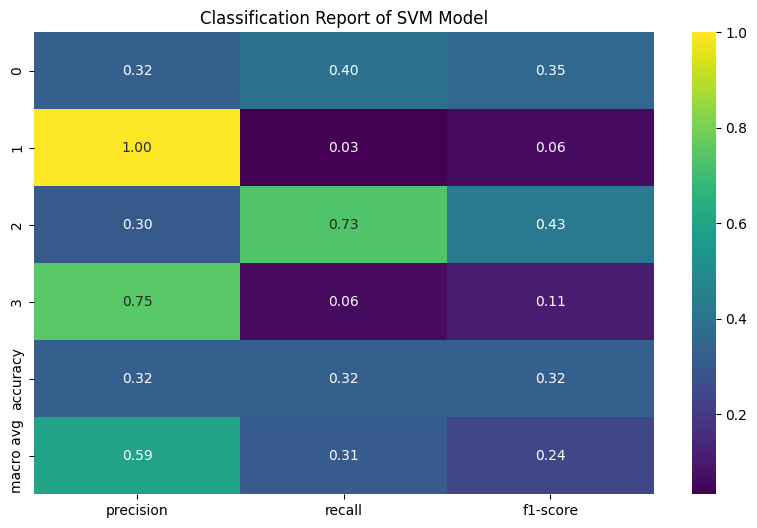

In [ ]:
RF_report = classification_report(y_test, y_pred_svm, output_dict=True)
# Convert the classification report to a DataFrame
RF_report_df = pd.DataFrame(RF_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(RF_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of SVM Model")
plt.show()

# **KNN Model**

In [ ]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
history_knn = knn_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
history_knn

KNeighborsClassifier()

In [ ]:
# Predict on the test set
y_pred_knn = knn_model.predict(X_test.reshape(X_test.shape[0], -1))

In [ ]:
# Calculate accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

KNN Accuracy: 0.51


KNN Train Accuracy: 0.66
KNN Test Accuracy: 0.51


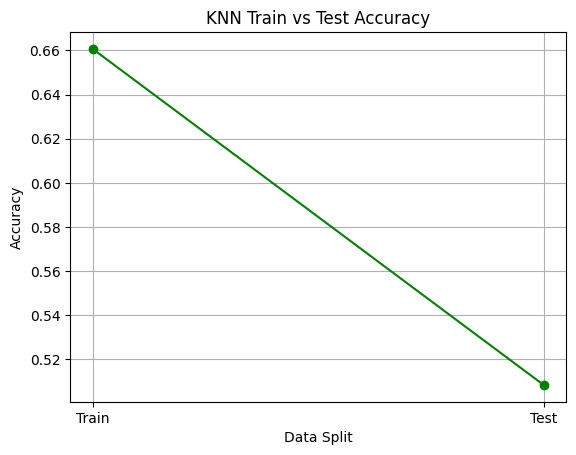

In [ ]:
# Plot KNN train and test accuracy
train_accuracy_knn = knn_model.score(X_train.reshape(X_train.shape[0], -1), y_train)
print(f'KNN Train Accuracy: {train_accuracy_knn:.2f}')
print(f'KNN Test Accuracy: {accuracy_knn:.2f}')
plt.figure()
plt.plot(['Train', 'Test'], [train_accuracy_knn, accuracy_knn], marker='o', linestyle='-', color='g')
plt.title('KNN Train vs Test Accuracy')
plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

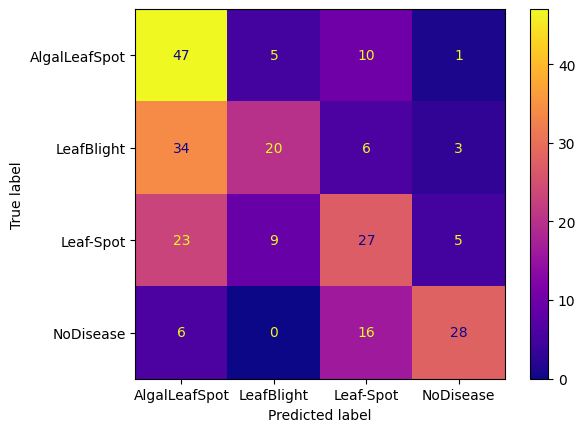

In [ ]:
# Display confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=subfolders)
disp_knn.plot(cmap='plasma')
plt.show()

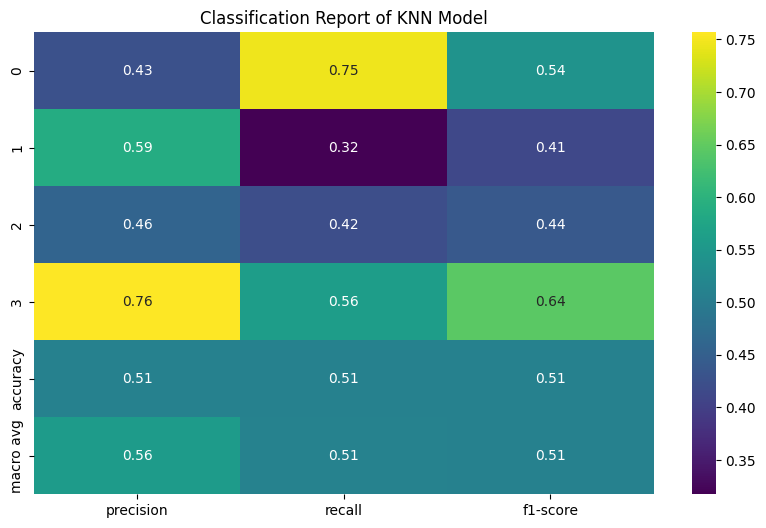

In [ ]:
RF_report = classification_report(y_test, y_pred_knn, output_dict=True)
# Convert the classification report to a DataFrame
RF_report_df = pd.DataFrame(RF_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(RF_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of KNN Model")
plt.show()

# **Naive Bayes model**

In [ ]:
# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

GaussianNB()

In [ ]:
# Predict on the test set
y_pred_nb = nb_model.predict(X_test.reshape(X_test.shape[0], -1))

In [ ]:
# Calculate accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')

Naive Bayes Accuracy: 0.45


Naive Bayes Train Accuracy: 0.57
Naive Bayes Test Accuracy: 0.45


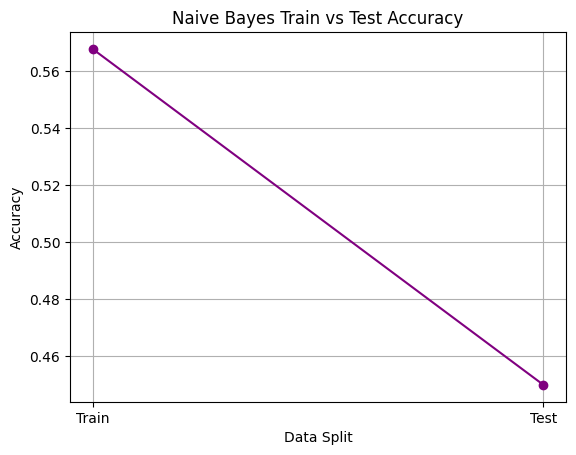

In [ ]:
# Plot Naive Bayes train and test accuracy
train_accuracy_nb = nb_model.score(X_train.reshape(X_train.shape[0], -1), y_train)
print(f'Naive Bayes Train Accuracy: {train_accuracy_nb:.2f}')
print(f'Naive Bayes Test Accuracy: {accuracy_nb:.2f}')
plt.figure()
plt.plot(['Train', 'Test'], [train_accuracy_nb, accuracy_nb], marker='o', linestyle='-', color='purple')
plt.title('Naive Bayes Train vs Test Accuracy')
plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

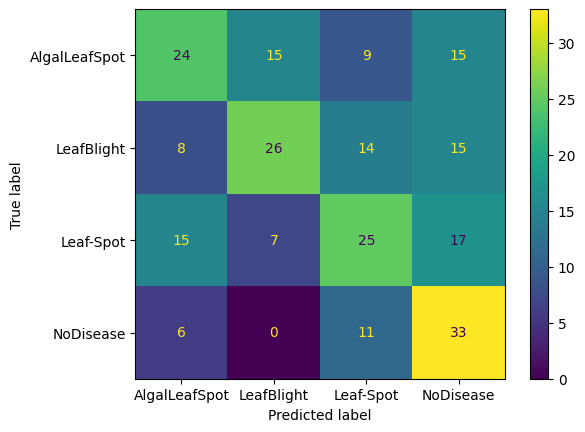

In [ ]:
# Display confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=subfolders)
disp_nb.plot(cmap='viridis')
plt.show()

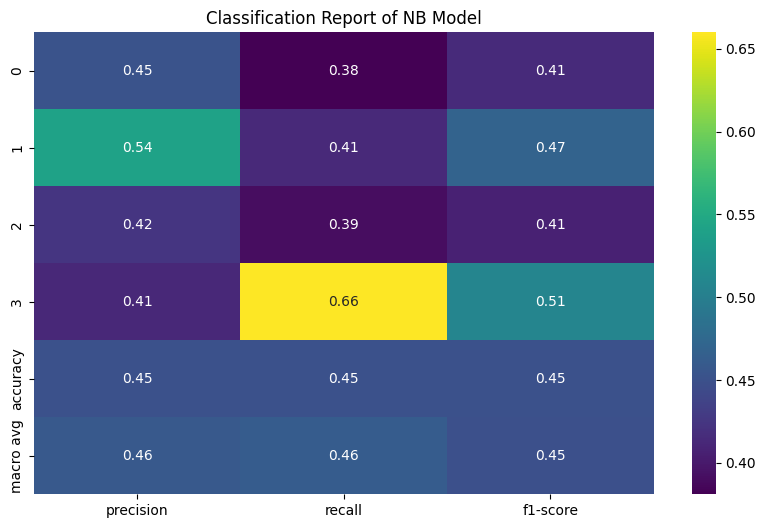

In [ ]:
RF_report = classification_report(y_test, y_pred_nb, output_dict=True)
# Convert the classification report to a DataFrame
RF_report_df = pd.DataFrame(RF_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(RF_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of NB Model")
plt.show()

# **CNN model**

In [ ]:
# Build and train a CNN model
cnn_model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(32, (3, 3), activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(8, activation='leaky_relu'),
    layers.Dropout(0.5),
    layers.Dense(len(subfolders), activation='softmax')
])
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │          25,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,012 (195.36 KB)

 Trainable params: 50,012 (195.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the CNN model
history_cnn = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2454 - loss: 2.0426 - val_accuracy: 0.2083 - val_loss: 1.8960
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.2718 - loss: 1.8609 - val_accuracy: 0.2083 - val_loss: 1.7810
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2953 - loss: 1.7511 - val_accuracy: 0.3452 - val_loss: 1.6869
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3111 - loss: 1.6615 - val_accuracy: 0.3929 - val_loss: 1.6096
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4129 - loss: 1.5707 - val_accuracy: 0.2619 - val_loss: 1.5499
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3267 - loss: 1.5456 - val_accuracy: 0.3810 - val_loss: 1.4712
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.3913 - loss: 1.4322 - val_accuracy: 0.4167 - val_loss: 1.3647
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4798 - loss: 1.3162 - val_accuracy: 0.4702 - val_loss:

In [ ]:
# Evaluate the CNN model
accuracy_cnn = cnn_model.evaluate(X_test, y_test)[1]
print(f'CNN Test Accuracy: {accuracy_cnn:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.5965 - loss: 1.1910
CNN Test Accuracy: 0.59


In [ ]:
# Predict on the test set using CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step


CNN Train Accuracy: 0.76
CNN Test Accuracy: 0.64


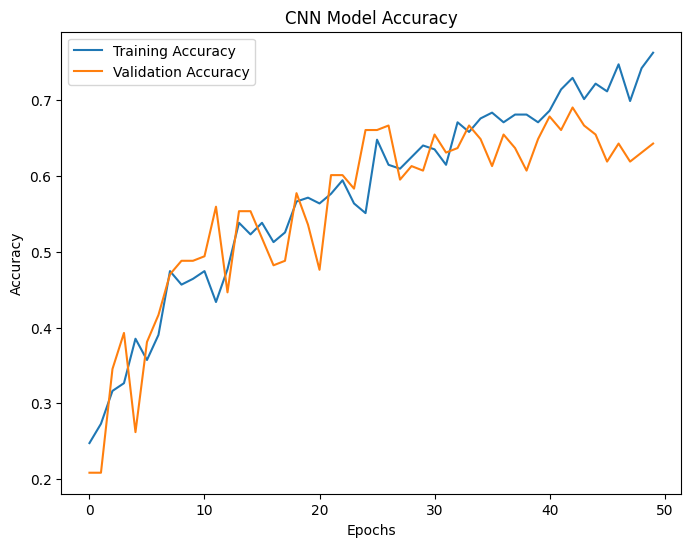

In [ ]:
# Plot CNN train and test accuracy
train_accuracy_cnn = history_cnn.history['accuracy'][-1]
val_accuracy_cnn = history_cnn.history['val_accuracy'][-1]
print(f'CNN Train Accuracy: {train_accuracy_cnn:.2f}')
print(f'CNN Test Accuracy: {val_accuracy_cnn:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

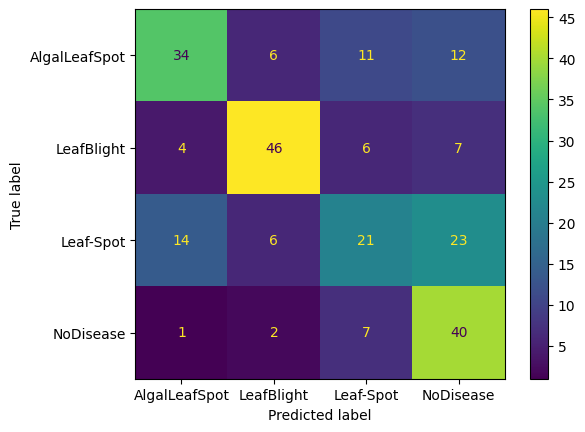

In [ ]:
# Display confusion matrix for CNN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=subfolders)
disp_cnn.plot(cmap='viridis')
plt.show()

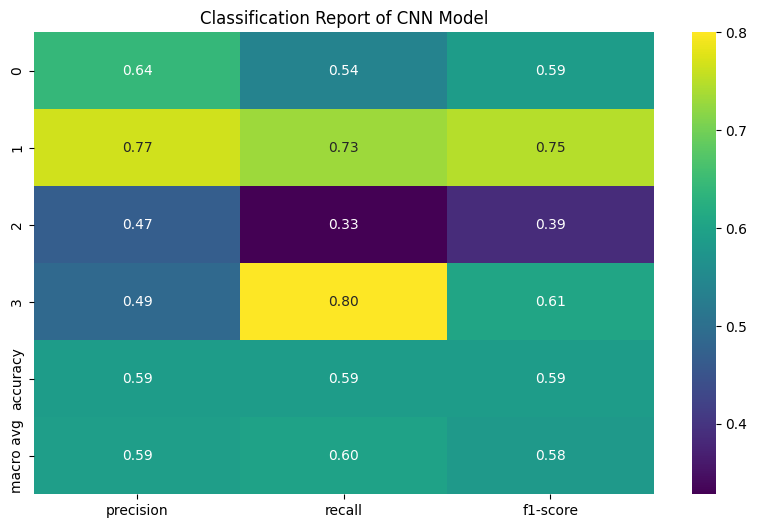

In [ ]:
RF_report = classification_report(y_test, y_pred_cnn, output_dict=True)
# Convert the classification report to a DataFrame
RF_report_df = pd.DataFrame(RF_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(RF_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of CNN Model")
plt.show()